In [13]:
import yfinance as yf 
import matplotlib.pyplot as plt
import numpy as np 

In [4]:
# Define the stock symbol and date range
stock_symbol = 'AAPL'  # Replace with the stock you want to analyze
start_date = '2022-01-01'
end_date = '2023-10-19'

In [5]:
# Fetch historical stock price data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate daily returns
stock_data['Daily_Return'] = stock_data['Adj Close'].pct_change()


[*********************100%%**********************]  1 of 1 completed


In [6]:
# Calculate historical volatility (e.g., 30-day rolling standard deviation)
window_size = 30
stock_data['Volatility'] = stock_data['Daily_Return'].rolling(window=window_size).std()

In [7]:
stock_data.dropna()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,Volatility
Date,,,,,,,,
2022-02-15,170.970001,172.949997,170.250000,172.789993,171.281067,62527400,0.023153,0.019301
2022-02-16,171.850006,173.339996,170.050003,172.550003,171.043167,61177400,-0.001389,0.019185
2022-02-17,171.029999,171.910004,168.470001,168.880005,167.405212,69589300,-0.021269,0.018965
2022-02-18,169.820007,170.539993,166.190002,167.300003,165.839005,82772700,-0.009356,0.018801
2022-02-22,164.979996,166.690002,162.149994,164.320007,162.885056,91162800,-0.017812,0.019054
...,...,...,...,...,...,...,...,...
2023-10-12,180.070007,182.339996,179.039993,180.710007,180.710007,56743100,0.005061,0.013191
2023-10-13,181.419998,181.929993,178.139999,178.850006,178.850006,51427100,-0.010293,0.013287
2023-10-16,176.750000,179.080002,176.509995,178.720001,178.720001,52517000,-0.000727,0.013153


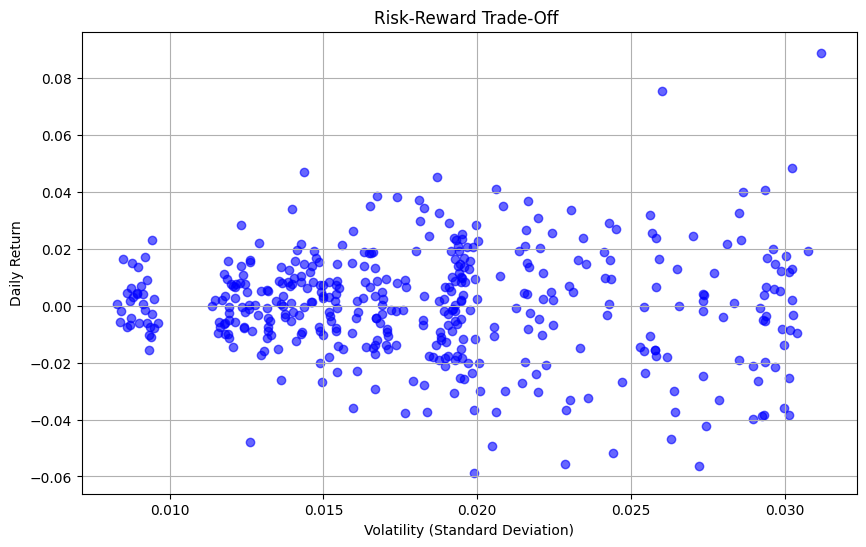

In [8]:
# Create a scatter plot to visualize the risk-reward trade-off
plt.figure(figsize=(10, 6))
plt.scatter(stock_data['Volatility'], stock_data['Daily_Return'], c='blue', alpha=0.6)
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Daily Return')
plt.title(f'Risk-Reward Trade-Off ')
plt.grid()

# Show the chart
plt.show()



In [18]:

# Define the risk-free rate (e.g., 10-year U.S. Treasury bond yield)
risk_free_rate = 0.047 # Example: 1.5%

In [19]:
# Calculate the Sharpe ratio
excess_returns = stock_data['Daily_Return'] - risk_free_rate
sharpe_ratio = (excess_returns.mean() / excess_returns.std()) * np.sqrt(252)  # Annualized Sharpe ratio, assuming 252 trading days

# Calculate the expected annual return
annual_return = (1 + stock_data['Daily_Return'].mean()) ** 252 - 1  # Annualized return, assuming 252 trading days


In [20]:
# Calculate the expected annual return
annual_return = (1 + stock_data['Daily_Return'].mean()) ** 252 - 1  # Annualized return, assuming 252 trading days


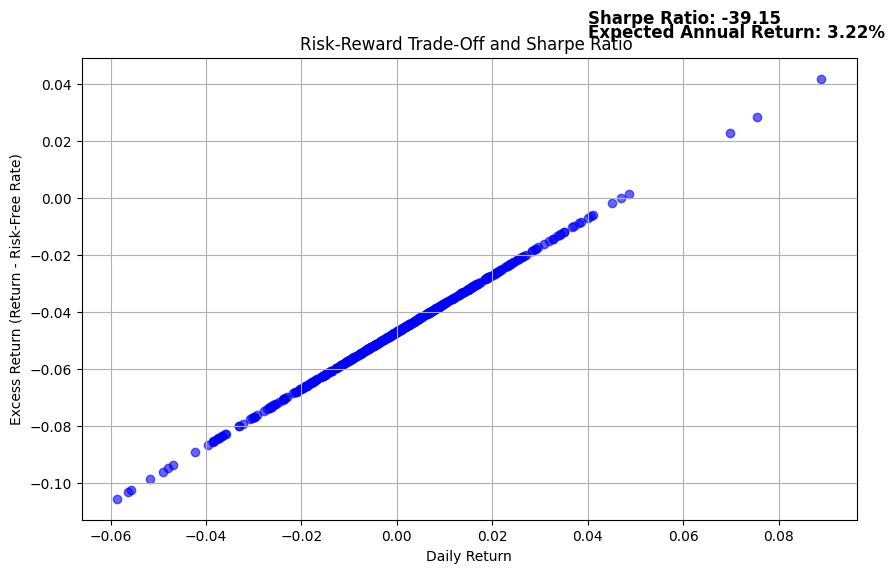

In [21]:
# Create a scatter plot to visualize the risk-reward trade-off and Sharpe ratio
plt.figure(figsize=(10, 6))
plt.scatter(stock_data['Daily_Return'], excess_returns, c='blue', alpha=0.6)
plt.xlabel('Daily Return')
plt.ylabel('Excess Return (Return - Risk-Free Rate)')
plt.title(f'Risk-Reward Trade-Off and Sharpe Ratio ')
plt.grid()

# Add Sharpe ratio and expected annual return to the plot
plt.text(0.04, 0.06, f'Sharpe Ratio: {sharpe_ratio:.2f}', ha='left', va='bottom', fontsize=12, color='black', weight='bold')
plt.text(0.04, 0.055, f'Expected Annual Return: {annual_return:.2%}', ha='left', va='bottom', fontsize=12, color='black', weight='bold')

# Show the chart
plt.show()


